# 1. Import Library

In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit


# 2. Membaca Dataset

In [739]:
# Membaca Dataset

df = pd.read_excel('evaluasi_penyelenggara_diklat_2022.xlsx') # berfungsi untuk membaca file excel
display(df.head()) # berfungsi untuk menampilkan 5 data teratas
display(df.tail()) # berfungsi untuk menampilkan 5 data terbawah

,1,2,3,4,5,6,7,8,9,outcome
0,95,98,98,98,98,85,95,90,1,94.63
1,95,95,100,95,100,100,100,100,1,98.13
2,100,100,100,99,100,100,100,100,1,99.88
3,95,80,95,90,95,95,95,95,1,92.50
4,100,100,100,100,100,100,100,100,1,100.00


,1,2,3,4,5,6,7,8,9,outcome
62,80,89,90,100,100,80,89,100,3,91.00
63,99,99,99,99,99,99,99,99,3,99.00
64,100,95,100,100,100,100,100,100,3,99.38
65,99,99,95,99,99,99,99,100,3,98.63
66,99,99,99,99,99,99,99,99,3,99.00


In [740]:
df.describe() # berfungsi untuk menampilkan deskripsi data

,1,2,3,4,5,6,7,8,9,outcome
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,93.104478,93.104478,93.134328,94.402985,93.597015,92.208955,92.731343,93.179104,1.985075,93.184328
std,7.532021,7.330167,7.141207,6.322302,7.551961,7.894258,8.316800,7.288275,0.861509,6.663348
min,69.000000,69.000000,69.000000,80.000000,69.000000,69.000000,69.000000,69.000000,1.000000,72.880000
25%,90.000000,90.000000,90.000000,90.000000,90.000000,86.500000,90.000000,90.000000,1.000000,90.000000
50%,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,2.000000,94.500000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.000000,99.190000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.000000,100.000000


In [741]:
# Menampilkan data yang memiliki nilai null

df.isnull().sum() # berfungsi untuk menampilkan jumlah data yang memiliki nilai null
print(len(df)) # berfungsi untuk menampilkan jumlah data

67


# 3. Data Preprocessing

In [742]:
# Memisahkan data menjadi 2 bagian yaitu X dan y atau data feature dan data target (outcome)

X = df.drop([9, 'outcome'], axis=1) # berfungsi untuk memisahkan data feature
y = df['outcome'] # berfungsi untuk memisahkan data target

display(X) # berfungsi untuk menampilkan data feature
display(pd.DataFrame(y)) # berfungsi untuk menampilkan data target

,1,2,3,4,5,6,7,8
0,95,98,98,98,98,85,95,90
1,95,95,100,95,100,100,100,100
2,100,100,100,99,100,100,100,100
3,95,80,95,90,95,95,95,95
4,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...
62,80,89,90,100,100,80,89,100
63,99,99,99,99,99,99,99,99
64,100,95,100,100,100,100,100,100
65,99,99,95,99,99,99,99,100


,outcome
0,94.63
1,98.13
2,99.88
3,92.50
4,100.00
...,...
62,91.00
63,99.00
64,99.38
65,98.63


In [743]:
def MinMaxScaler(data): # berfungsi untuk melakukan normalisasi data
    numerator = data - np.min(data, 0) # berfungsi untuk menghitung nilai minimum
    denominator = np.max(data, 0) - np.min(data, 0) # berfungsi untuk menghitung nilai maksimum
    return numerator / denominator # berfungsi untuk mengembalikan nilai normalisasi

In [744]:
# X = MinMaxScaler(X) # berfungsi untuk melakukan normalisasi data feature
# y = MinMaxScaler(y) # berfungsi untuk melakukan normalisasi data target
display(X) # berfungsi untuk menampilkan data feature yang sudah dinormalisasi

,1,2,3,4,5,6,7,8
0,95,98,98,98,98,85,95,90
1,95,95,100,95,100,100,100,100
2,100,100,100,99,100,100,100,100
3,95,80,95,90,95,95,95,95
4,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...
62,80,89,90,100,100,80,89,100
63,99,99,99,99,99,99,99,99
64,100,95,100,100,100,100,100,100
65,99,99,95,99,99,99,99,100


In [745]:
X_pca = PCA(n_components=1).fit_transform(X) # berfungsi untuk melakukan reduksi dimensi data feature
X = pd.DataFrame(X_pca) # berfungsi untuk mengubah data feature menjadi dataframe
X = X.rename(columns={0: 'PCA1'}) # berfungsi untuk mengubah nama kolom
display(X) # berfungsi untuk menampilkan data feature yang sudah direduksi dimensinya

,PCA1
0,-3.595822
1,-14.484461
2,-19.069250
3,1.221273
4,-19.317943
...,...
62,7.458287
63,-16.510338
64,-17.565368
65,-15.482725


In [746]:
X = MinMaxScaler(X) # berfungsi untuk melakukan normalisasi data feature
y = MinMaxScaler(y) # berfungsi untuk melakukan normalisasi data target
display(X) # berfungsi untuk menampilkan data feature yang sudah dinormalisasi

,PCA1
0,1.981956e-01
1,6.093166e-02
2,3.135062e-03
3,2.589207e-01
4,1.343583e-16
...,...
62,3.375455e-01
63,3.539313e-02
64,2.209325e-02
65,4.834737e-02


In [747]:
X_y = pd.concat([X, y], axis=1) # berfungsi untuk menggabungkan data feature dan data target
display(X_y)

,PCA1,outcome
0,1.981956e-01,0.801991
1,6.093166e-02,0.931047
2,3.135062e-03,0.995575
3,2.589207e-01,0.723451
4,1.343583e-16,1.000000
...,...,...
62,3.375455e-01,0.668142
63,3.539313e-02,0.963127
64,2.209325e-02,0.977139
65,4.834737e-02,0.949484


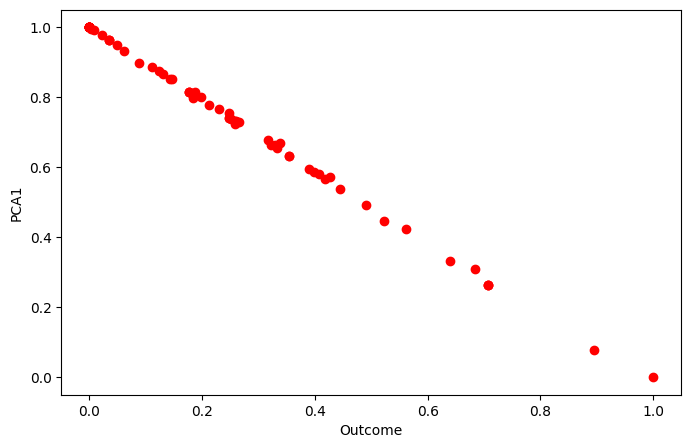

In [748]:
plt.figure(figsize=(8,5))
x_data, y_data = (X_y["PCA1"].values, X_y["outcome"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('PCA1')
plt.xlabel('Outcome')
plt.show()

# 4. Modelling

In [749]:
# make Non linear programming

def tanh_deriv(x, C): # berfungsi untuk menghitung turunan fungsi tangen hiperbolik
    return C - np.tanh(x)**2

In [750]:
X = tanh_deriv(X, 0.8) # berfungsi untuk memanggil fungsi non linear
display(X)

,PCA1
0,0.761725
1,0.796297
2,0.799990
3,0.735846
4,0.800000
...,...
62,0.694190
63,0.798748
64,0.799512
65,0.797666


In [751]:
X_y_new = pd.concat([X, y], axis=1) # berfungsi untuk menggabungkan data feature dan data target
X_y_new = X_y_new.rename(columns={'PCA1': 'y_pred'}) # berfungsi untuk mengubah nama kolom
display(X_y_new)

,y_pred,outcome
0,0.761725,0.801991
1,0.796297,0.931047
2,0.799990,0.995575
3,0.735846,0.723451
4,0.800000,1.000000
...,...,...
62,0.694190,0.668142
63,0.798748,0.963127
64,0.799512,0.977139
65,0.797666,0.949484


,YEAR,MONTH,WTI_PRICE,HH_PRICE,NGL_PRICE,BEST_PRICE
0,2000,1,27.24,2.40,0.555,26.6020
1,2000,2,29.21,2.66,0.596,28.8013
2,2000,3,29.92,2.78,0.512,29.0381
3,2000,4,25.78,3.04,0.469,25.0476
4,2000,5,28.78,3.59,0.512,28.3888
...,...,...,...,...,...,...
148,2014,9,93.35,3.92,1.062,90.0960
149,2015,1,47.60,2.97,0.478,47.6140
150,2015,7,51.16,2.83,0.409,51.0360
151,2016,1,31.70,2.27,0.336,30.5580


Initial Objective: 153.0
Final Objective: 0.07875714399540343
Solution
A = 1.043821099005109
B = 0.9770328965715737
C = 0.02362544926988419
D = 0.022436014962395154
R^2 correlation = 0.9964348634418513


,ym,y
0,26.6020,26.553162
1,28.8013,28.542634
2,29.0381,29.151240
3,25.0476,25.207306
4,28.3888,28.235618
...,...,...
148,90.0960,90.801987
149,47.6140,45.885976
150,51.0360,49.008307
151,30.5580,30.408469


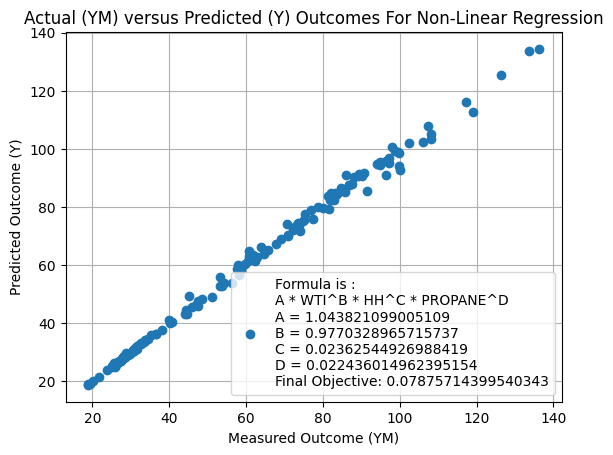

In [760]:
# Energy price non-linear regression
# solve for oil sales price (outcome)
# using 3 predictors of WTI Oil Price,
#   Henry Hub Price and MB Propane Spot Price
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data file from URL address
data = 'https://apmonitor.com/me575/uploads/Main/oil_data.txt'
df = pd.read_csv(data)
display(df)

xm1 = np.array(df["WTI_PRICE"])  # WTI Oil Price
xm2 = np.array(df["HH_PRICE"])   # Henry Hub Gas Price
xm3 = np.array(df["NGL_PRICE"])  # MB Propane Spot Price
ym = np.array(df["BEST_PRICE"])  # oil sales price received (outcome)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )
    return y

# define objective
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(4)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP', bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

# print solution
print('Solution')

cA = 'A = ' + str(x[0])
print(cA)
cB = 'B = ' + str(x[1])
print(cB)
cC = 'C = ' + str(x[2])
print(cC)
cD = 'D = ' + str(x[3])
print(cD)

cFormula = "Formula is : " + "\n" \
           + "A * WTI^B * HH^C * PROPANE^D"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n" + cObjective

#ym measured outcome
#y  predicted outcome

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

display(pd.DataFrame({'ym':ym,'y':y}))
# plot solution
plt.figure(1)
plt.title('Actual (YM) versus Predicted (Y) Outcomes For Non-Linear Regression')
plt.plot(ym,y,'o')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend([cLegend])
plt.grid(True)
plt.show()